# Multilayer Perceptron

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# remove the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
tips = sns.load_dataset('tips')

# preprocess the data
# create the dummy variables for the categorical data
tips = pd.get_dummies(tips, drop_first=True)

# split the data into features and target
X = tips.drop('tip', axis=1)
y = tips['tip']

# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
X_train.shape

(195, 8)

In [11]:
# build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse', 'mape', tf.keras.metrics.RootMeanSquaredError()])

Epoch 1/100
7/7 [==============================] - 0s 16ms/step - loss: 0.3891 - mae: 0.4613 - mse: 0.3891 - mape: 18.0718 - root_mean_squared_error: 0.6238
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 0.3984 - mae: 0.4764 - mse: 0.3984 - mape: 19.0316 - root_mean_squared_error: 0.6312
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.3810 - mae: 0.4599 - mse: 0.3810 - mape: 17.9359 - root_mean_squared_error: 0.6172
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.4216 - mae: 0.4788 - mse: 0.4216 - mape: 17.8158 - root_mean_squared_error: 0.6493
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.4173 - mae: 0.4748 - mse: 0.4173 - mape: 17.5437 - root_mean_squared_error: 0.6460
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.4073 - mae: 0.4860 - mse: 0.4073 - mape: 18.9943 - root_mean_squared_error: 0.6382
Epoch 7/100
7/7 [==============================] - 0s 12ms

KeyError: 'val_loss'

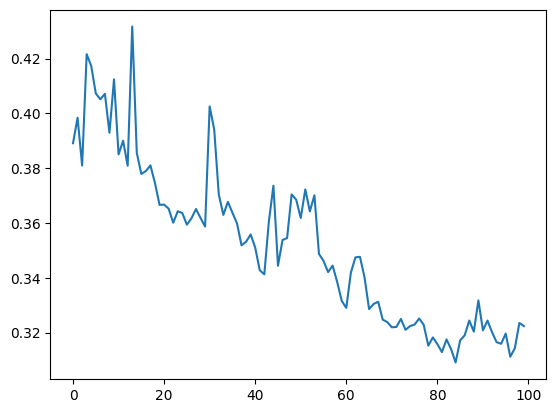

In [ ]:
# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
loss = model.evaluate(X_test, y_test, verbose=1)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'])
plt.show()

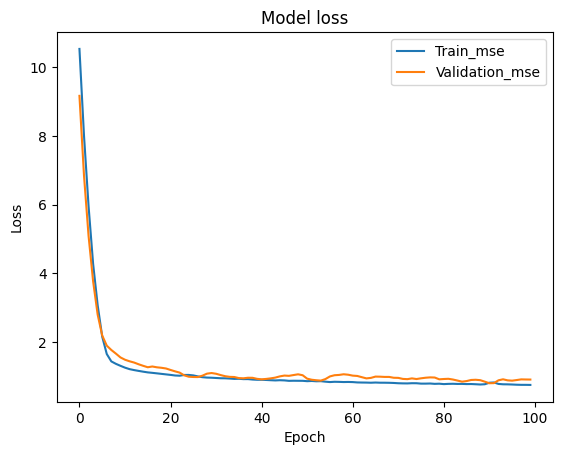

In [24]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_mse', 'Validation_mse'], loc='upper right')
plt.show()